
# Short tutorial to learn the basics of classification using TensorFLow


Start with importing tensor flow into the environment, also load the data and seperate into testing and training sets



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

We now will need to build the actual model. This will be a sequential model, i.e. sequential layers in the classification network. We also add the following:

**Loss function:** This is used to measure how well the model is performing, furthermore, we calculate the gradient of this function to then optimize the coefficients in our neural network

**Optimizer:** This will be the type of algorithm that will be used for optimizing the coefficients in our model. SGD for example is stochastic gradient descent, where the gradient of the loss function will be calculated and we move the coefficients in such a way as to minimize this gradient
    

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #This flattens the input image
    tf.keras.layers.Dense(128, activation='relu'), #This is a dense linear neural network with 128 nodes and a relu activation
    tf.keras.layers.Dropout(0.2), #Random dropout function that removes results from 0.2 of the nodes randomly. Prevents overfitting
    tf.keras.layers.Dense(10) #final 10 node layer, this is 10 nodes because the output we want is meant to be 1 of 10 digits
])

**Flatten:** Flattens input 28 by 28 image into a length 128 vector. <br> 
**Dense:** Dense meaning fully connected neural network, all inputs are connected to all subsequent nodes <br>
**Droput:** Dropout sparsifies the nueral network and also decorrealtes the weigths of the coefficients <br>

This particular model will return a log probability as the result, this can normally be softmax activated to get a stronger result 

In [3]:
predictions = model(x_train[:1]).numpy() #training the model on the first point 
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[-0.42625797, -0.27867287,  0.09177861,  0.14969194, -0.63222826,
         0.2013379 , -0.4230966 ,  0.23928696, -0.18708405, -0.05973872]],
      dtype=float32)

Like I said, we are now going to softmax

In [4]:
tf.nn.softmax(predictions).numpy()

array([[0.07160678, 0.08299454, 0.12020832, 0.12737553, 0.05827769,
        0.1341268 , 0.07183351, 0.13931459, 0.09095488, 0.1033074 ]],
      dtype=float32)

*The reason this softmax was not directly in our nueral network however was because it is more difficult to provide a numerically stable loss function when using softmax as an activation function*

We now ise losses.SparseCategoricalCrossentropy to calculate the scaler loss for the model. The loss is equal to

$$Loss = -\sum_{c=1}^M y_{o,c}\log(p_{o,c})$$

where M is the number of classes, y is the label of class c for observation o, and p is the predicted probability observation o is from class c

In an untrained model, the probability that any label is correct is 1/10, therefore the the loss should be 

$$-\log(1/10) = 2.33$$

In [5]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

2.0089698

Now we will actually train our model, this will be done by defining an appropriate loss function and an optimizer, we then also define a metric upon which we wish to optimize, in this case it is accuracy.

In [6]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
weights = model.get_weights()
reset_model = lambda model:model.set_weights(weights)

We now us the **model.fit** method to train/fit our model onto our data, we run this over 5 epochs, or 5 iterations

In [7]:
history = model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2969 - accuracy: 0.9130
Epoch 2/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.1419 - accuracy: 0.9574
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1040 - accuracy: 0.9678
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0866 - accuracy: 0.9737
Epoch 5/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0734 - accuracy: 0.9768


In [8]:
history.history


{'loss': [0.29689465343554816,
  0.14188283665776252,
  0.1039569809327523,
  0.08655823602651556,
  0.07341321638574203],
 'accuracy': [0.913, 0.95738333, 0.9678, 0.9737167, 0.97676665]}

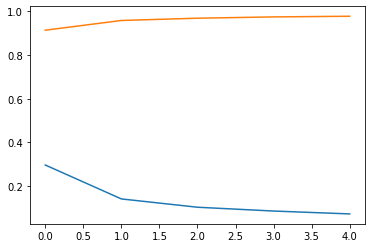

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.show()

We can now evaluate our model using **model.evaluate** this is done on the validation set and allows us to see how well our model performs on data it has not seen before.


In [10]:
model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 0s - loss: 0.0711 - accuracy: 0.9775


[0.0710690984073095, 0.9775]

Thats it really, this basically allows you to traina simple model and evaluate it. We even graphed the predictions. Normally you would run something like this for a lot more epochs and then tune your model to run on the number of epochs that gives the lowest loss and highest accuracy without overfitting. This is done by running. Let us try doing this below:

Train on 60000 samples
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2555 - accuracy: 0.9244
10000/10000 - 0s - loss: 0.1256 - accuracy: 0.9628


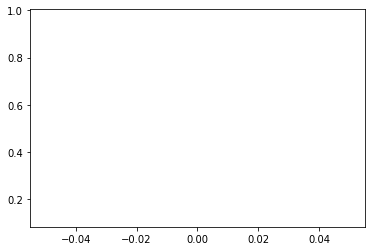

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2700 - accuracy: 0.9212
Epoch 2/2
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1361 - accuracy: 0.9594
10000/10000 - 0s - loss: 0.0960 - accuracy: 0.9703


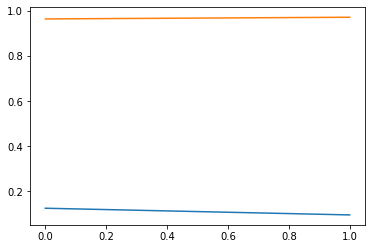

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2669 - accuracy: 0.9200
Epoch 2/3
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1351 - accuracy: 0.9597
Epoch 3/3
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1027 - accuracy: 0.9687
10000/10000 - 0s - loss: 0.0863 - accuracy: 0.9733


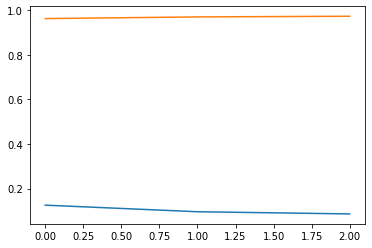

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2647 - accuracy: 0.9217
Epoch 2/4
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1354 - accuracy: 0.9597
Epoch 3/4
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1057 - accuracy: 0.9679
Epoch 4/4
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0878 - accuracy: 0.9730
10000/10000 - 0s - loss: 0.0806 - accuracy: 0.9756


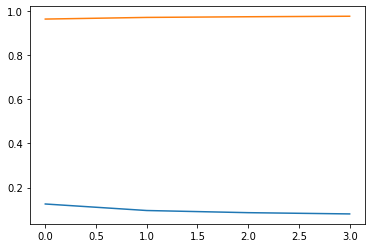

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2623 - accuracy: 0.9224
Epoch 2/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1335 - accuracy: 0.9596
Epoch 3/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1028 - accuracy: 0.9683
Epoch 4/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0843 - accuracy: 0.9731
Epoch 5/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0726 - accuracy: 0.9774
10000/10000 - 0s - loss: 0.0731 - accuracy: 0.9769


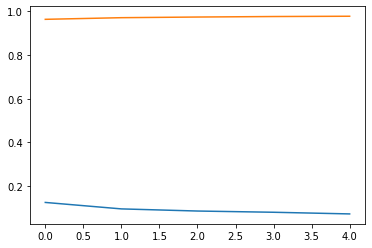

Train on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2618 - accuracy: 0.9221
Epoch 2/6
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1333 - accuracy: 0.9600
Epoch 3/6
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1001 - accuracy: 0.9692
Epoch 4/6
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0853 - accuracy: 0.9738
Epoch 5/6
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0739 - accuracy: 0.9774
Epoch 6/6
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0638 - accuracy: 0.9796
10000/10000 - 0s - loss: 0.0723 - accuracy: 0.9783


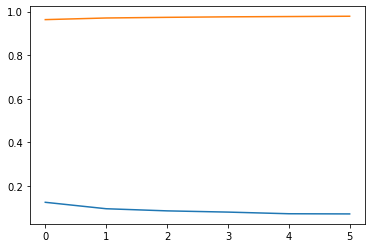

Train on 60000 samples
Epoch 1/7
60000/60000 [==============================] - 12s 193us/sample - loss: 0.2551 - accuracy: 0.9241
Epoch 2/7
60000/60000 [==============================] - 11s 183us/sample - loss: 0.1312 - accuracy: 0.9618
Epoch 3/7
60000/60000 [==============================] - 11s 186us/sample - loss: 0.0985 - accuracy: 0.9703
Epoch 4/7
60000/60000 [==============================] - 12s 200us/sample - loss: 0.0828 - accuracy: 0.9737
Epoch 5/7
60000/60000 [==============================] - 12s 208us/sample - loss: 0.0719 - accuracy: 0.9763
Epoch 6/7
60000/60000 [==============================] - 12s 195us/sample - loss: 0.0626 - accuracy: 0.9800
Epoch 7/7
60000/60000 [==============================] - 12s 198us/sample - loss: 0.0559 - accuracy: 0.9819
10000/10000 - 1s - loss: 0.0679 - accuracy: 0.9810


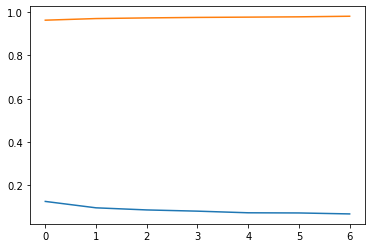

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 10s 167us/sample - loss: 0.2592 - accuracy: 0.9232
Epoch 2/8
60000/60000 [==============================] - 10s 165us/sample - loss: 0.1339 - accuracy: 0.9601
Epoch 3/8
60000/60000 [==============================] - 11s 179us/sample - loss: 0.1058 - accuracy: 0.9676
Epoch 4/8
60000/60000 [==============================] - 11s 181us/sample - loss: 0.0868 - accuracy: 0.9736
Epoch 5/8
60000/60000 [==============================] - 11s 181us/sample - loss: 0.0747 - accuracy: 0.9767
Epoch 6/8
60000/60000 [==============================] - 11s 179us/sample - loss: 0.0667 - accuracy: 0.9786
Epoch 7/8
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0599 - accuracy: 0.9808
Epoch 8/8
60000/60000 [==============================] - 10s 173us/sample - loss: 0.0530 - accuracy: 0.9825
10000/10000 - 1s - loss: 0.0705 - accuracy: 0.9799


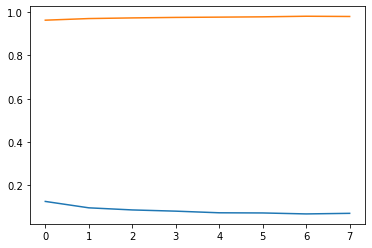

Train on 60000 samples
Epoch 1/9
60000/60000 [==============================] - 10s 161us/sample - loss: 0.2537 - accuracy: 0.9249
Epoch 2/9
60000/60000 [==============================] - 11s 178us/sample - loss: 0.1284 - accuracy: 0.9618
Epoch 3/9
60000/60000 [==============================] - 12s 200us/sample - loss: 0.0985 - accuracy: 0.9699
Epoch 4/9
60000/60000 [==============================] - 11s 187us/sample - loss: 0.0812 - accuracy: 0.9742
Epoch 5/9
60000/60000 [==============================] - 12s 208us/sample - loss: 0.0722 - accuracy: 0.9771
Epoch 6/9
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0625 - accuracy: 0.9800
Epoch 7/9
60000/60000 [==============================] - 12s 197us/sample - loss: 0.0553 - accuracy: 0.9817
Epoch 8/9
60000/60000 [==============================] - 11s 186us/sample - loss: 0.0522 - accuracy: 0.9826
Epoch 9/9
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0462 - accuracy: 0.9850
10000/

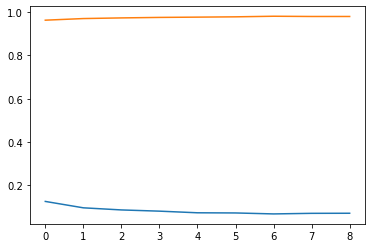

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.2611 - accuracy: 0.9236
Epoch 2/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1331 - accuracy: 0.9604
Epoch 3/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.1022 - accuracy: 0.9690
Epoch 4/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.0844 - accuracy: 0.9742
Epoch 5/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.0728 - accuracy: 0.9771
Epoch 6/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.0634 - accuracy: 0.9800
Epoch 7/10
60000/60000 [==============================] - 12s 192us/sample - loss: 0.0582 - accuracy: 0.9815
Epoch 8/10
60000/60000 [==============================] - 11s 182us/sample - loss: 0.0510 - accuracy: 0.9829
Epoch 9/10
60000/60000 [==============================] - 11s 192us/sample - loss: 0.0494 - accuracy: 0.98

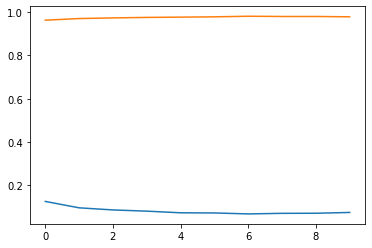

Train on 60000 samples
Epoch 1/11
60000/60000 [==============================] - 10s 167us/sample - loss: 0.2564 - accuracy: 0.9230
Epoch 2/11
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1350 - accuracy: 0.9597
Epoch 3/11
60000/60000 [==============================] - 11s 181us/sample - loss: 0.1033 - accuracy: 0.9686
Epoch 4/11
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0876 - accuracy: 0.9731
Epoch 5/11
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0725 - accuracy: 0.9772
Epoch 6/11
60000/60000 [==============================] - 10s 168us/sample - loss: 0.0676 - accuracy: 0.9778
Epoch 7/11
60000/60000 [==============================] - 11s 175us/sample - loss: 0.0593 - accuracy: 0.9809
Epoch 8/11
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0524 - accuracy: 0.9826
Epoch 9/11
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0482 - accuracy: 0.9

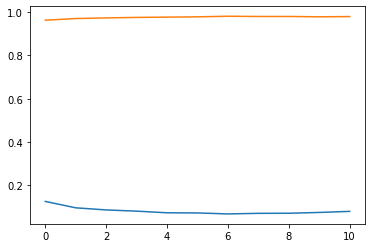

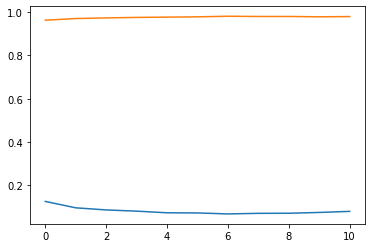

In [12]:
loss = []
accuracy = []

for e in range(1,12):
    reset_model(model)
    model.fit(x_train, y_train, epochs=e)
    result = model.evaluate(x_test, y_test, verbose=2)
    loss.append(result[0])
    accuracy.append(result[1])
    plt.plot(loss)
    plt.plot(accuracy)
    plt.show()
    
plt.plot(loss)
plt.plot(accuracy)
plt.show()

After running the model multiple times in a for loop, we can see that the best accruacy and loss before overfitting occurs at epoch 6, therefore that is the number of epochs that should be used when releasing the model in production 

In [20]:
min(range(len(loss)), key=loss.__getitem__)

6

In [21]:
max(range(len(accuracy)), key=accuracy.__getitem__)

6

This is the end of this tutprial and documentation of this 